<a href="https://colab.research.google.com/github/stuned/Mestrado/blob/main/BERT-Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conectando no meu drive pessoal e instalando a biblioteca do tweetnlp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tweetnlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 97.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of datasets to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Importando e atribuindo todas as bibliotecas e modelos que serão utilizados

In [ ]:
import tweetnlp
import tensorflow as tf
from transformers import pipeline
import timeit
from time import sleep
from IPython.display import clear_output
from tqdm.notebook import tqdm_notebook
import pandas as pd
import numpy as np
import os
from datetime import timedelta
import json

In [ ]:
# Atribuindo os modelos que serão utilizados
model_emotion = tweetnlp.load_model('emotion', model_name='cardiffnlp/twitter-roberta-base-emotion-multilabel-latest')
sentiment_task = tweetnlp.load_model('sentiment', model_name='cardiffnlp/twitter-roberta-base-sentiment-latest')

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# ***Modelo de Emoção***

## Lendo CSV Origem e dividindo arquivo para executar

In [ ]:
tweets = pd.read_csv ('/content/drive/MyDrive/mestrado - base de dados/tweets completos.csv', dtype = {'Unnamed: 0': str, 'Datetime': str, 'Tweet Id': str, 'Text': str, 'Username': str, 'reply_count': str, 'retweet_count': str,
                                                         'like_count': str, 'quote_count': str, 'language': str, 'id_if_retweetd_tweet': str, 'id_if_quoted_tweet': str, 'filename': str},
                    engine='python',encoding='utf-8', on_bad_lines='skip')
tweets.head()

In [ ]:
# Retirando valores de texto de tweets nulos
tweets = tweets[tweets['Text'].notnull()]

In [ ]:
#checando operação anterior
[tweets['Text'].isnull()]

In [ ]:
# Dividindo arquivo em 10 partes para executar mais rapidamente
tweets_split = np.array_split(tweets, 10)

In [ ]:
# atribuindo um dataframe a uma parte do arquivo
tweets_test1 = tweets_split[0]
tweets_test2 = tweets_split[1]
tweets_test3 = tweets_split[2]
tweets_test4 = tweets_split[3]
tweets_test5 = tweets_split[4]
tweets_test6 = tweets_split[5]
tweets_test7 = tweets_split[6]
tweets_test8 = tweets_split[7]
tweets_test9 = tweets_split[8]
tweets_test10 = tweets_split[9]

## Execução do modelo de *EMOÇÃO* em cada parte fracionada

In [ ]:
# Slice 1 tweets_test1

result_emotion = []
inicio_emotion_time = timeit.default_timer()
with tf.device('/device:GPU:0'):
  for row in tqdm_notebook(tweets_test1.itertuples(index=True, name='Pandas'), desc = 'Progress using tqdm_notebook()', total = tweets_test1.shape[0]):
    emotion = model_emotion.predict(getattr(row, "Text"), return_probability=True)
    result_emotion.append(emotion)
    #print(getattr(row, "Text"))
    sleep(0.01)
tweets_test1["Result_Emotion"] = result_emotion
fim_emotion_time = timeit.default_timer()
print ('duracao exec modelo de emoções: %f' % (fim_emotion_time - inicio_emotion_time))
print(tweets_test1)

In [ ]:
tweets_test1.to_csv('tweets_test1.csv', encoding='utf-8')

In [ ]:
# Slice 2 tweets_test2

result_emotion = []
inicio_emotion_time = timeit.default_timer()
with tf.device('/device:GPU:0'):
  for row in tqdm_notebook(tweets_test2.itertuples(index=True, name='Pandas'), desc = 'Progress using tqdm_notebook()', total = tweets_test2.shape[0]):
    emotion = model_emotion.predict(getattr(row, "Text"), return_probability=True)
    result_emotion.append(emotion)
    #print(getattr(row, "Text"))
tweets_test2["Result_Emotion"] = result_emotion
fim_emotion_time = timeit.default_timer()
print ('duracao exec modelo de emoções: %f' % (fim_emotion_time - inicio_emotion_time))
print(tweets_test2)

In [ ]:
tweets_test2.to_csv('tweets_test2.csv', encoding='utf-8')

In [ ]:
# Slice 3 tweets_test3

result_emotion = []
inicio_emotion_time = timeit.default_timer()
with tf.device('/device:GPU:0'):
  for row in tqdm_notebook(tweets_test3.itertuples(index=True, name='Pandas'), desc = 'Progress using tqdm_notebook()', total = tweets_test3.shape[0]):
    emotion = model_emotion.predict(getattr(row, "Text"), return_probability=True)
    result_emotion.append(emotion)
    #print(getattr(row, "Text"))
tweets_test3["Result_Emotion"] = result_emotion
fim_emotion_time = timeit.default_timer()
print ('duracao exec modelo de emoções: %f' % (fim_emotion_time - inicio_emotion_time))
print(tweets_test3)

In [ ]:
tweets_test3.to_csv('tweets_test3.csv', encoding='utf-8')

In [ ]:
# Slice 4 tweets_test4

result_emotion = []
inicio_emotion_time = timeit.default_timer()
with tf.device('/device:GPU:0'):
  for row in tqdm_notebook(tweets_test4.itertuples(index=True, name='Pandas'), desc = 'Progress using tqdm_notebook()', total = tweets_test4.shape[0]):
    emotion = model_emotion.predict(getattr(row, "Text"), return_probability=True)
    result_emotion.append(emotion)
    #print(getattr(row, "Text"))
tweets_test4["Result_Emotion"] = result_emotion
fim_emotion_time = timeit.default_timer()
print ('duracao exec modelo de emoções: %f' % (fim_emotion_time - inicio_emotion_time))
print(tweets_test4)

In [ ]:
tweets_test4.to_csv('tweets_test4.csv', encoding='utf-8')

In [ ]:
# Slice 5 tweets_test5

result_emotion = []
inicio_emotion_time = timeit.default_timer()
with tf.device('/device:GPU:0'):
  for row in tqdm_notebook(tweets_test5.itertuples(index=True, name='Pandas'), desc = 'Progress using tqdm_notebook()', total = tweets_test5.shape[0]):
    emotion = model_emotion.predict(getattr(row, "Text"), return_probability=True)
    result_emotion.append(emotion)
    #print(getattr(row, "Text"))
tweets_test5["Result_Emotion"] = result_emotion
fim_emotion_time = timeit.default_timer()
print ('duracao exec modelo de emoções: %f' % (fim_emotion_time - inicio_emotion_time))
print(tweets_test5)

In [ ]:
tweets_test5.to_csv('tweets_test5.csv', encoding='utf-8')

In [ ]:
# Slice 6 tweets_test6

result_emotion = []
inicio_emotion_time = timeit.default_timer()
with tf.device('/device:GPU:0'):
  for row in tqdm_notebook(tweets_test6.itertuples(index=True, name='Pandas'), desc = 'Progress using tqdm_notebook()', total = tweets_test6.shape[0]):
    emotion = model_emotion.predict(getattr(row, "Text"), return_probability=True)
    result_emotion.append(emotion)
    #print(getattr(row, "Text"))
tweets_test6["Result_Emotion"] = result_emotion
fim_emotion_time = timeit.default_timer()
print ('duracao exec modelo de emoções: %f' % (fim_emotion_time - inicio_emotion_time))
print(tweets_test6)

In [ ]:
tweets_test6.to_csv('tweets_test6.csv', encoding='utf-8')

In [ ]:
# Slice 7 tweets_test7

result_emotion = []
inicio_emotion_time = timeit.default_timer()
with tf.device('/device:GPU:0'):
  for row in tqdm_notebook(tweets_test7.itertuples(index=True, name='Pandas'), desc = 'Progress using tqdm_notebook()', total = tweets_test7.shape[0]):
    emotion = model_emotion.predict(getattr(row, "Text"), return_probability=True)
    result_emotion.append(emotion)
    #print(getattr(row, "Text"))
tweets_test7["Result_Emotion"] = result_emotion
fim_emotion_time = timeit.default_timer()
print ('duracao exec modelo de emoções: %f' % (fim_emotion_time - inicio_emotion_time))
print(tweets_test7)

In [ ]:
tweets_test7.to_csv('tweets_test7.csv', encoding='utf-8')

In [ ]:
# Slice 8 tweets_test8

result_emotion = []
inicio_emotion_time = timeit.default_timer()
with tf.device('/device:GPU:0'):
  for row in tqdm_notebook(tweets_test8.itertuples(index=True, name='Pandas'), desc = 'Progress using tqdm_notebook()', total = tweets_test8.shape[0]):
    emotion = model_emotion.predict(getattr(row, "Text"), return_probability=True)
    result_emotion.append(emotion)
    #print(getattr(row, "Text"))
tweets_test8["Result_Emotion"] = result_emotion
fim_emotion_time = timeit.default_timer()
print ('duracao exec modelo de emoções: %f' % (fim_emotion_time - inicio_emotion_time))
print(tweets_test8)

In [ ]:
tweets_test8.to_csv('tweets_test8.csv', encoding='utf-8')

In [ ]:
# Slice 9 tweets_test9

result_emotion = []
inicio_emotion_time = timeit.default_timer()
with tf.device('/device:GPU:0'):
  for row in tqdm_notebook(tweets_test9.itertuples(index=True, name='Pandas'), desc = 'Progress using tqdm_notebook()', total = tweets_test9.shape[0]):
    emotion = model_emotion.predict(getattr(row, "Text"), return_probability=True)
    result_emotion.append(emotion)
    #print(getattr(row, "Text"))
tweets_test9["Result_Emotion"] = result_emotion
fim_emotion_time = timeit.default_timer()
print ('duracao exec modelo de emoções: %f' % (fim_emotion_time - inicio_emotion_time))
print(tweets_test9)

In [ ]:
tweets_test9.to_csv('tweets_test9.csv', encoding='utf-8')

In [ ]:
# Slice 10 tweets_test10

result_emotion = []
inicio_emotion_time = timeit.default_timer()
with tf.device('/device:GPU:0'):
  for row in tqdm_notebook(tweets_test10.itertuples(index=True, name='Pandas'), desc = 'Progress using tqdm_notebook()', total = tweets_test10.shape[0]):
    emotion = model_emotion.predict(getattr(row, "Text"), return_probability=True)
    result_emotion.append(emotion)
    #print(getattr(row, "Text"))
tweets_test10["Result_Emotion"] = result_emotion
fim_emotion_time = timeit.default_timer()
print ('duracao exec modelo de emoções: %f' % (fim_emotion_time - inicio_emotion_time))
print(tweets_test10)

In [ ]:
tweets_test10.to_csv('tweets_test10.csv', encoding='utf-8')

## Juntando todos os arquivos fracionados após execução do modelo de emoção em apenas um

In [ ]:
# replace with your folder's path
folder_path = r'/content/drive/MyDrive/mestrado - base de dados/tweets_split_emotion'

all_files = os.listdir(folder_path)

# Filter out non-CSV files
csv_files = [f for f in all_files if f.endswith('.csv')]

# Create a list to hold the dataframes
df_list = []

for csv in csv_files:
    file_path = os.path.join(folder_path, csv)
    try:
        # Try reading the file using default UTF-8 encoding
        df = pd.read_csv(file_path, dtype = {'Unnamed: 0': str, 'Datetime': str, 'Tweet Id': str, 'Text': str, 'Username': str, 'reply_count': str, 'retweet_count': str,
                                                         'like_count': str, 'quote_count': str, 'language': str, 'id_if_retweetd_tweet': str, 'id_if_quoted_tweet': str, 'filename': str, 'Result_Emotion': str},
                    engine='python',encoding='utf-8', on_bad_lines='skip')
        df_list.append(df)
    except UnicodeDecodeError:
        try:
            # If UTF-8 fails, try reading the file using UTF-16 encoding with tab separator
            df = pd.read_csv(file_path, sep='\t', encoding='utf-16')
            df_list.append(df)
        except Exception as e:
            print(f"Could not read file {csv} because of error: {e}")
    except Exception as e:
        print(f"Could not read file {csv} because of error: {e}")

# Concatenate all data into one DataFrame
big_df = pd.concat(df_list, ignore_index=True)

# Save the final result to a new CSV file
big_df.to_csv(os.path.join(folder_path, 'combined_tweets_emotion.csv'), index=False)

# ***Modelo de Sentimento***

## Lendo CSV origem (com dados do modelo de emoção) e dividindo arquivo para executar

In [ ]:
tweets_sentiment_csv = pd.read_csv ('/content/drive/MyDrive/mestrado - base de dados/tweets_split_emotion/combined_tweets_emotion.csv', dtype = {'Unnamed: 0': str, 'Datetime': str, 'Tweet Id': str, 'Text': str, 'Username': str, 'reply_count': str, 'retweet_count': str,
                                                         'like_count': str, 'quote_count': str, 'language': str, 'id_if_retweetd_tweet': str, 'id_if_quoted_tweet': str, 'filename': str, 'Result_emotion': str},
                    engine='python',encoding='utf-8', on_bad_lines='skip')
tweets_sentiment_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4953374 entries, 0 to 4953373
Data columns (total 15 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Unnamed: 0.1          object
 1   Unnamed: 0            object
 2   Datetime              object
 3   Tweet Id              object
 4   Text                  object
 5   Username              object
 6   reply_count           object
 7   retweet_count         object
 8   like_count            object
 9   quote_count           object
 10  language              object
 11  id_if_retweetd_tweet  object
 12  íd_if_quoted_tweet    object
 13  filename              object
 14  Result_Emotion        object
dtypes: object(15)
memory usage: 566.9+ MB


In [ ]:
tweets_sentiment_csv = tweets_sentiment_csv[tweets_sentiment_csv['Text'].notnull()]

In [ ]:
[tweets_sentiment_csv['Text'].isnull()]

[0          False
 1          False
 2          False
 3          False
 4          False
            ...  
 4953369    False
 4953370    False
 4953371    False
 4953372    False
 4953373    False
 Name: Text, Length: 4952962, dtype: bool]

In [ ]:
tweets_sentiment_csv_split = np.array_split(tweets_sentiment_csv, 10)

In [ ]:
tweets_test1_sentiment = tweets_sentiment_csv_split[0]
tweets_test2_sentiment = tweets_sentiment_csv_split[1]
tweets_test3_sentiment = tweets_sentiment_csv_split[2]
tweets_test4_sentiment = tweets_sentiment_csv_split[3]
tweets_test5_sentiment = tweets_sentiment_csv_split[4]
tweets_test6_sentiment = tweets_sentiment_csv_split[5]
tweets_test7_sentiment = tweets_sentiment_csv_split[6]
tweets_test8_sentiment = tweets_sentiment_csv_split[7]
tweets_test9_sentiment = tweets_sentiment_csv_split[8]
tweets_test10_sentiment = tweets_sentiment_csv_split[9]

## Execução do modelo de *SENTIMENTO* em cada parte fracionada

In [ ]:
# Slice 1 tweets_test1_sentiment

result_sentiment = []
inicio_sentiment_time = timeit.default_timer()
with tf.device('/device:GPU:0'):
  for row in tqdm_notebook(tweets_test1_sentiment.itertuples(index=True, name='Pandas'), desc = 'Progress using tqdm_notebook()', total = tweets_test1_sentiment.shape[0]):
    sentiment = sentiment_task.predict(getattr(row, "Text"), return_probability=True)
    result_sentiment.append(sentiment)
    #print(getattr(row, "Text"))
    sleep(0.01)
tweets_test1_sentiment["Result_Sentiment"] = result_sentiment
fim_sentiment_time = timeit.default_timer()
print ('duracao exec modelo de sentimentos: %f' % (fim_sentiment_time - inicio_sentiment_time))
print(tweets_test1_sentiment)

In [ ]:
tweets_test1_sentiment.to_csv('tweets_test1_sentiment.csv', encoding='utf-8')

In [ ]:
# Slice 2 tweets_test2_sentiment

result_sentiment = []
inicio_sentiment_time = timeit.default_timer()
with tf.device('/device:GPU:0'):
  for row in tqdm_notebook(tweets_test2_sentiment.itertuples(index=True, name='Pandas'), desc = 'Progress using tqdm_notebook()', total = tweets_test2_sentiment.shape[0]):
    sentiment = sentiment_task.predict(getattr(row, "Text"), return_probability=True)
    result_sentiment.append(sentiment)
    #print(getattr(row, "Text"))
    sleep(0.01)
tweets_test2_sentiment["Result_Sentiment"] = result_sentiment
fim_sentiment_time = timeit.default_timer()
print ('duracao exec modelo de sentimentos: %f' % (fim_sentiment_time - inicio_sentiment_time))
print(tweets_test2_sentiment)

Progress using tqdm_notebook():   0%|          | 0/495297 [00:00<?, ?it/s]

duracao exec modelo de sentimentos: 35032.877140
       Unnamed: 0.1 Unnamed: 0                   Datetime            Tweet Id  \
495330      4952414         6"  I want to see World War Z            RiqqBoii   
495331      4952415    5331983  2013-06-21 20:14:21+00:00  348172056426336257   
495332      4952416    5331984  2013-06-21 20:14:20+00:00  348172050663358467   
495333      4952417    5331985  2013-06-21 20:14:19+00:00  348172045898633216   
495334      4952418    5331986  2013-06-21 20:14:18+00:00  348172043461746688   
...             ...        ...                        ...                 ...   
990704       495216     495213  2013-02-19 23:39:56+00:00  304012471147048960   
990705       495217     495214  2013-02-19 23:37:58+00:00  304011976869302272   
990706       495218     495215  2013-02-19 23:35:33+00:00  304011371417309185   
990707       495219     495216  2013-02-19 23:34:31+00:00  304011111806664704   
990708       495220     495217  2013-02-19 23:32:37+00:00  3

In [ ]:
tweets_test2_sentiment.to_csv('tweets_test2_sentiment.csv', encoding='utf-8')

In [ ]:
# Slice 3 tweets_test3_sentiment

result_sentiment = []
inicio_sentiment_time = timeit.default_timer()
with tf.device('/device:GPU:0'):
  for row in tqdm_notebook(tweets_test3_sentiment.itertuples(index=True, name='Pandas'), desc = 'Progress using tqdm_notebook()', total = tweets_test3_sentiment.shape[0]):
    sentiment = sentiment_task.predict(getattr(row, "Text"), return_probability=True)
    result_sentiment.append(sentiment)
    #print(getattr(row, "Text"))
    sleep(0.01)
tweets_test3_sentiment["Result_Sentiment"] = result_sentiment
fim_sentiment_time = timeit.default_timer()
print ('duracao exec modelo de sentimentos: %f' % (fim_sentiment_time - inicio_sentiment_time))
print(tweets_test3_sentiment)

Progress using tqdm_notebook():   0%|          | 0/495296 [00:00<?, ?it/s]

In [ ]:
tweets_test3_sentiment.to_csv('tweets_test3_sentiment.csv', encoding='utf-8')

In [ ]:
# Slice 4 tweets_test4_sentiment

result_sentiment = []
inicio_sentiment_time = timeit.default_timer()
with tf.device('/device:GPU:0'):
  for row in tqdm_notebook(tweets_test4_sentiment.itertuples(index=True, name='Pandas'), desc = 'Progress using tqdm_notebook()', total = tweets_test4_sentiment.shape[0]):
    sentiment = sentiment_task.predict(getattr(row, "Text"), return_probability=True)
    result_sentiment.append(sentiment)
    #print(getattr(row, "Text"))
    sleep(0.01)
tweets_test4_sentiment["Result_Sentiment"] = result_sentiment
fim_sentiment_time = timeit.default_timer()
print ('duracao exec modelo de sentimentos: %f' % (fim_sentiment_time - inicio_sentiment_time))
print(tweets_test4_sentiment)

Progress using tqdm_notebook():   0%|          | 0/495296 [00:00<?, ?it/s]

duracao exec modelo de sentimentos: 32145.033771
        Unnamed: 0.1 Unnamed: 0                   Datetime  \
1486045       990461     990444  2017-03-01 01:08:26+00:00   
1486046       990462     990445  2017-03-01 01:08:25+00:00   
1486047       990463     990446  2017-03-01 01:08:24+00:00   
1486048       990464     990447  2017-03-01 01:08:20+00:00   
1486049       990465     990448  2017-03-01 01:08:20+00:00   
...              ...        ...                        ...   
1981441      1485673    1485673  2018-07-20 21:13:48+00:00   
1981442      1485674    1485674  2018-07-20 21:11:16+00:00   
1981443      1485675    1485675  2018-07-20 21:10:34+00:00   
1981444      1485676    1485676  2018-07-20 21:09:25+00:00   
1981445      1485677    1485677  2018-07-20 21:08:06+00:00   

                    Tweet Id  \
1486045   836744907184308228   
1486046   836744904856506369   
1486047   836744900557344768   
1486048   836744881800425472   
1486049   836744881590652928   
...           

In [ ]:
tweets_test4_sentiment.to_csv('tweets_test4_sentiment.csv', encoding='utf-8')

In [ ]:
# Slice 5 tweets_test5_sentiment

result_sentiment = []
inicio_sentiment_time = timeit.default_timer()
with tf.device('/device:GPU:0'):
  for row in tqdm_notebook(tweets_test5_sentiment.itertuples(index=True, name='Pandas'), desc = 'Progress using tqdm_notebook()', total = tweets_test5_sentiment.shape[0]):
    sentiment = sentiment_task.predict(getattr(row, "Text"), return_probability=True)
    result_sentiment.append(sentiment)
    #print(getattr(row, "Text"))
    sleep(0.01)
tweets_test5_sentiment["Result_Sentiment"] = result_sentiment
fim_sentiment_time = timeit.default_timer()
print ('duracao exec modelo de sentimentos: %f' % (fim_sentiment_time - inicio_sentiment_time))
print(tweets_test5_sentiment)

Progress using tqdm_notebook():   0%|          | 0/495296 [00:00<?, ?it/s]

duracao exec modelo de sentimentos: 36638.472733
        Unnamed: 0.1 Unnamed: 0                   Datetime  \
1981446      1485678    1485678  2018-07-20 21:07:41+00:00   
1981447      1485679    1485679  2018-07-20 21:06:58+00:00   
1981448      1485680    1485680  2018-07-20 21:06:52+00:00   
1981449      1485681    1485681  2018-07-20 21:05:12+00:00   
1981450      1485682    1485682  2018-07-20 21:03:34+00:00   
...              ...        ...                        ...   
2476772      1980925    1980914  2013-01-21 07:03:17+00:00   
2476773      1980926    1980915  2013-01-21 07:03:13+00:00   
2476774      1980927    1980916  2013-01-21 07:01:52+00:00   
2476775      1980928    1980917  2013-01-21 07:01:17+00:00   
2476776      1980929    1980918  2013-01-21 07:01:09+00:00   

                    Tweet Id  \
1981446  1020414967848275969   
1981447  1020414785945571330   
1981448  1020414762499354624   
1981449  1020414345036140544   
1981450  1020413932052377601   
...           

In [ ]:
tweets_test5_sentiment.to_csv('tweets_test5_sentiment.csv', encoding='utf-8')

In [ ]:
# Slice 6 tweets_test6_sentiment

result_sentiment = []
inicio_sentiment_time = timeit.default_timer()
with tf.device('/device:GPU:0'):
  for row in tqdm_notebook(tweets_test6_sentiment.itertuples(index=True, name='Pandas'), desc = 'Progress using tqdm_notebook()', total = tweets_test6_sentiment.shape[0]):
    sentiment = sentiment_task.predict(getattr(row, "Text"), return_probability=True)
    result_sentiment.append(sentiment)
    #print(getattr(row, "Text"))
    sleep(0.01)
tweets_test6_sentiment["Result_Sentiment"] = result_sentiment
fim_sentiment_time = timeit.default_timer()
print ('duracao exec modelo de sentimentos: %f' % (fim_sentiment_time - inicio_sentiment_time))
print(tweets_test6_sentiment)

Progress using tqdm_notebook():   0%|          | 0/495296 [00:00<?, ?it/s]

duracao exec modelo de sentimentos: 31971.251304
        Unnamed: 0.1 Unnamed: 0                   Datetime  \
2476777      1980930    1980919  2013-01-21 07:00:43+00:00   
2476778      1980931    1980920  2013-01-21 07:00:09+00:00   
2476779      1980932    1980921  2013-01-21 06:59:28+00:00   
2476780      1980933    1980922  2013-01-21 06:59:27+00:00   
2476781      1980934    1980923  2013-01-21 06:58:54+00:00   
...              ...        ...                        ...   
2972096      2476164    2476162  2015-02-06 03:08:25+00:00   
2972097      2476165    2476163  2015-02-06 03:08:24+00:00   
2972098      2476166    2476164  2015-02-06 03:08:13+00:00   
2972099      2476167    2476165  2015-02-06 03:07:27+00:00   
2972100      2476168    2476166  2015-02-06 03:07:19+00:00   

                   Tweet Id  \
2476777  293251764478689280   
2476778  293251620807012352   
2476779  293251450363060224   
2476780  293251446646906880   
2476781  293251305999314944   
...                 

In [ ]:
tweets_test6_sentiment.to_csv('tweets_test6_sentiment.csv', encoding='utf-8')

In [ ]:
# Slice 7 tweets_test7_sentiment

result_sentiment = []
inicio_sentiment_time = timeit.default_timer()
with tf.device('/device:GPU:0'):
  for row in tqdm_notebook(tweets_test7_sentiment.itertuples(index=True, name='Pandas'), desc = 'Progress using tqdm_notebook()', total = tweets_test7_sentiment.shape[0]):
    sentiment = sentiment_task.predict(getattr(row, "Text"), return_probability=True)
    result_sentiment.append(sentiment)
    #print(getattr(row, "Text"))
    sleep(0.01)
tweets_test7_sentiment["Result_Sentiment"] = result_sentiment
fim_sentiment_time = timeit.default_timer()
print ('duracao exec modelo de sentimentos: %f' % (fim_sentiment_time - inicio_sentiment_time))
print(tweets_test7_sentiment)

Progress using tqdm_notebook():   0%|          | 0/495296 [00:00<?, ?it/s]

duracao exec modelo de sentimentos: 30189.067535
        Unnamed: 0.1 Unnamed: 0                   Datetime  \
2972101      2476169    2476167  2015-02-06 03:07:16+00:00   
2972102      2476170    2476168  2015-02-06 03:07:02+00:00   
2972103      2476171    2476169  2015-02-06 03:06:49+00:00   
2972104      2476172    2476170  2015-02-06 03:06:36+00:00   
2972105      2476173    2476171  2015-02-06 03:06:23+00:00   
...              ...        ...                        ...   
3467399      3466684    3466683  2013-07-19 02:48:08+00:00   
3467400      3466685    3466684  2013-07-19 02:48:08+00:00   
3467401      3466686    3466685  2013-07-19 02:48:07+00:00   
3467402      3466687    3466686  2013-07-19 02:48:05+00:00   
3467403      3466688    3466687  2013-07-19 02:48:03+00:00   

                   Tweet Id  \
2972101  563534362051104768   
2972102  563534302441254912   
2972103  563534250096357376   
2972104  563534195897937920   
2972105  563534140415291393   
...                 

In [ ]:
tweets_test7_sentiment.to_csv('tweets_test7_sentiment.csv', encoding='utf-8')

In [ ]:
# Slice 8 tweets_test8_sentiment

result_sentiment = []
inicio_sentiment_time = timeit.default_timer()
with tf.device('/device:GPU:0'):
  for row in tqdm_notebook(tweets_test8_sentiment.itertuples(index=True, name='Pandas'), desc = 'Progress using tqdm_notebook()', total = tweets_test8_sentiment.shape[0]):
    sentiment = sentiment_task.predict(getattr(row, "Text"), return_probability=True)
    result_sentiment.append(sentiment)
    #print(getattr(row, "Text"))
    sleep(0.01)
tweets_test8_sentiment["Result_Sentiment"] = result_sentiment
fim_sentiment_time = timeit.default_timer()
print ('duracao exec modelo de sentimentos: %f' % (fim_sentiment_time - inicio_sentiment_time))
print(tweets_test8_sentiment)

Progress using tqdm_notebook():   0%|          | 0/495296 [00:00<?, ?it/s]

duracao exec modelo de sentimentos: 31496.320709
        Unnamed: 0.1 Unnamed: 0                   Datetime  \
3467404      3466689    3466688  2013-07-19 02:48:02+00:00   
3467405      3466690    3466689  2013-07-19 02:48:02+00:00   
3467406      3466691    3466690  2013-07-19 02:48:00+00:00   
3467407      3466692    3466691  2013-07-19 02:48:00+00:00   
3467408      3466693    3466692  2013-07-19 02:48:00+00:00   
...              ...        ...                        ...   
3962717      2971447    2971447  2013-07-23 20:09:06+00:00   
3962718      2971448    2971448  2013-07-23 20:09:06+00:00   
3962719      2971449    2971449  2013-07-23 20:09:02+00:00   
3962720      2971450    2971450  2013-07-23 20:09:02+00:00   
3962721      2971451    2971451  2013-07-23 20:09:01+00:00   

                   Tweet Id  \
3467404  358055602217426944   
3467405  358055600837496832   
3467406  358055594965889024   
3467407  358055594869006337   
3467408  358055594281811969   
...                 

In [ ]:
tweets_test8_sentiment.to_csv('tweets_test8_sentiment.csv', encoding='utf-8')

In [ ]:
# Slice 9 tweets_test9_sentiment

result_sentiment = []
inicio_sentiment_time = timeit.default_timer()
with tf.device('/device:GPU:0'):
  for row in tqdm_notebook(tweets_test9_sentiment.itertuples(index=True, name='Pandas'), desc = 'Progress using tqdm_notebook()', total = tweets_test9_sentiment.shape[0]):
    sentiment = sentiment_task.predict(getattr(row, "Text"), return_probability=True)
    result_sentiment.append(sentiment)
    #print(getattr(row, "Text"))
    sleep(0.01)
tweets_test9_sentiment["Result_Sentiment"] = result_sentiment
fim_sentiment_time = timeit.default_timer()
elapsed = (fim_sentiment_time - inicio_sentiment_time)
#print ('duracao exec modelo de sentimentos: %f' % str(timedelta(seconds=elapsed)))
#print ('duracao exec modelo de sentimentos: %f' % elapsed)
print(tweets_test9_sentiment)

Progress using tqdm_notebook():   0%|          | 0/495296 [00:00<?, ?it/s]

In [ ]:
tweets_test9_sentiment.to_csv('tweets_test9_sentiment.csv', encoding='utf-8')

In [ ]:
# Slice 10 tweets_test10_sentiment

result_sentiment = []
inicio_sentiment_time = timeit.default_timer()
with tf.device('/device:GPU:0'):
  for row in tqdm_notebook(tweets_test10_sentiment.itertuples(index=True, name='Pandas'), desc = 'Progress using tqdm_notebook()', total = tweets_test10_sentiment.shape[0]):
    sentiment = sentiment_task.predict(getattr(row, "Text"), return_probability=True)
    result_sentiment.append(sentiment)
    #print(getattr(row, "Text"))
    sleep(0.01)
tweets_test10_sentiment["Result_Sentiment"] = result_sentiment
fim_sentiment_time = timeit.default_timer()
print ('duracao exec modelo de sentimentos: %f' % (fim_sentiment_time - inicio_sentiment_time))
print(tweets_test10_sentiment)

Progress using tqdm_notebook():   0%|          | 0/495296 [00:00<?, ?it/s]

duracao exec modelo de sentimentos: 31468.019174
        Unnamed: 0.1 Unnamed: 0                   Datetime  \
4458066      3961915    3961818  2018-09-10 15:50:40+00:00   
4458067      3961916    3961819  2018-09-10 15:50:31+00:00   
4458068      3961917    3961820  2018-09-10 15:50:24+00:00   
4458069      3961918    3961821  2018-09-10 15:50:18+00:00   
4458070      3961919    3961822  2018-09-10 15:50:13+00:00   
...              ...        ...                        ...   
4953369      4457174    4457167  2013-06-01 09:37:10+00:00   
4953370      4457175    4457168  2013-06-01 09:36:54+00:00   
4953371      4457176    4457169  2013-06-01 09:36:35+00:00   
4953372      4457177    4457170  2013-06-01 09:33:59+00:00   
4953373      4457178    4457171  2013-06-01 09:33:23+00:00   

                    Tweet Id  \
4458066  1039179356147339264   
4458067  1039179320802074629   
4458068  1039179290862972929   
4458069  1039179266100023296   
4458070  1039179244453093376   
...           

In [ ]:
tweets_test10_sentiment.to_csv('tweets_test10_sentiment.csv', encoding='utf-8')

## Juntando todos os arquivos fracionados em apenas um arquivo, após execução do modelo de sentimento

In [ ]:
# replace with your folder's path
folder_path = r'/content/drive/MyDrive/mestrado - base de dados/tweets_split_sentiment'

all_files = os.listdir(folder_path)

# Filter out non-CSV files
csv_files = [f for f in all_files if f.endswith('.csv')]

# Create a list to hold the dataframes
df_list = []

for csv in csv_files:
    file_path = os.path.join(folder_path, csv)
    try:
        # Try reading the file using default UTF-8 encoding
        df = pd.read_csv(file_path, dtype = {'Unnamed: 0': str, 'Datetime': str, 'Tweet Id': str, 'Text': str, 'Username': str, 'reply_count': str, 'retweet_count': str,
                                                         'like_count': str, 'quote_count': str, 'language': str, 'id_if_retweetd_tweet': str, 'id_if_quoted_tweet': str, 'filename': str, 'Result_Emotion': str, 'Result_Sentiment': str},
                    engine='python',encoding='utf-8', on_bad_lines='skip')
        df_list.append(df)
    except UnicodeDecodeError:
        try:
            # If UTF-8 fails, try reading the file using UTF-16 encoding with tab separator
            df = pd.read_csv(file_path, sep='\t', encoding='utf-16')
            df_list.append(df)
        except Exception as e:
            print(f"Could not read file {csv} because of error: {e}")
    except Exception as e:
        print(f"Could not read file {csv} because of error: {e}")

# Concatenate all data into one DataFrame
big_df = pd.concat(df_list, ignore_index=True)

# Save the final result to a new CSV file
big_df.to_csv(os.path.join(folder_path, 'combined_tweets_sentiment_emotion.csv'), index=False)

# Lendo e tratamento a base completa após aplicação dos modelos

In [ ]:
base_completa = pd.read_csv ('/content/drive/MyDrive/mestrado - base de dados/combined_tweets_sentiment_emotion.csv', dtype = {'Unnamed: 0.2': str, 'Unnamed: 0.1': str, 'Unnamed: 0': str, 'Datetime': str, 'Tweet Id': str, 'Text': str, 'Username': str, 'reply_count': str, 'retweet_count': str,
                                                         'like_count': str, 'quote_count': str, 'language': str, 'id_if_retweetd_tweet': str, 'id_if_quoted_tweet': str, 'filename': str, 'Result_Emotion': str, 'Result_Sentiment': str},
                    engine='python',encoding='utf-8', on_bad_lines='skip')
base_completa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4952962 entries, 0 to 4952961
Data columns (total 17 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Unnamed: 0.2          object
 1   Unnamed: 0.1          object
 2   Unnamed: 0            object
 3   Datetime              object
 4   Tweet Id              object
 5   Text                  object
 6   Username              object
 7   reply_count           object
 8   retweet_count         object
 9   like_count            object
 10  quote_count           object
 11  language              object
 12  id_if_retweetd_tweet  object
 13  íd_if_quoted_tweet    object
 14  filename              object
 15  Result_Emotion        object
 16  Result_Sentiment      object
dtypes: object(17)
memory usage: 642.4+ MB


In [ ]:
base_completa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4952962 entries, 0 to 4952961
Data columns (total 17 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Unnamed: 0.2          object
 1   Unnamed: 0.1          object
 2   Unnamed: 0            object
 3   Datetime              object
 4   Tweet Id              object
 5   Text                  object
 6   Username              object
 7   reply_count           object
 8   retweet_count         object
 9   like_count            object
 10  quote_count           object
 11  language              object
 12  id_if_retweetd_tweet  object
 13  íd_if_quoted_tweet    object
 14  filename              object
 15  Result_Emotion        object
 16  Result_Sentiment      object
dtypes: object(17)
memory usage: 642.4+ MB


In [ ]:
base_completa.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Text,Username,reply_count,retweet_count,like_count,quote_count,language,id_if_retweetd_tweet,íd_if_quoted_tweet,filename,Result_Emotion,Result_Sentiment
0,4458066,3961915,3961818,2018-09-10 15:50:40+00:00,1039179356147339264,"[Blu-ray] ""The Nun"" bekommt auch eine Auswertu...",DVDForumat,0,0,0,0,de,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'joy', 'probability': {'anger': 0.00...","{'label': 'neutral', 'probability': {'negative..."
1,4458067,3961916,3961819,2018-09-10 15:50:31+00:00,1039179320802074629,What Does the Demon Nun From ‘The Nun’ Really ...,ReelTalker,0,0,0,0,en,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'anticipation', 'probability': {'ang...","{'label': 'neutral', 'probability': {'negative..."
2,4458068,3961917,3961820,2018-09-10 15:50:24+00:00,1039179290862972929,Hal yang mengejutkan dalam film The Nun adalah...,bachtiarrosd,0,0,1,0,in,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'joy', 'probability': {'anger': 0.00...","{'label': 'neutral', 'probability': {'negative..."
3,4458069,3961918,3961821,2018-09-10 15:50:18+00:00,1039179266100023296,Jaja assistir The Nun,iWalyson,0,0,0,0,es,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'anticipation', 'probability': {'ang...","{'label': 'neutral', 'probability': {'negative..."
4,4458070,3961919,3961822,2018-09-10 15:50:13+00:00,1039179244453093376,I liked a @YouTube video https://t.co/41senMHN...,charles_leroy,0,0,0,0,en,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'joy', 'probability': {'anger': 0.00...","{'label': 'positive', 'probability': {'negativ..."


In [ ]:
#base_completa['Result_Emotion_Dict'] = base_completa['Result_Emotion'].str.replace('\'','\"')
tweets_test_split = pd.DataFrame()
tweets_test_split['Result_Emotion'] = base_completa['Result_Emotion']
tweets_test_split['Result_Sentiment'] = base_completa['Result_Sentiment']
tweets_test_split['Tweet Id'] = base_completa['Tweet Id']
tweets_test_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4952962 entries, 0 to 4952961
Data columns (total 3 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Result_Emotion    object
 1   Result_Sentiment  object
 2   Tweet Id          object
dtypes: object(3)
memory usage: 113.4+ MB


In [ ]:
from numpy import nan

In [ ]:
result_emotion = []
result_sentiment = []
for row in tqdm_notebook(tweets_test_split.itertuples(index=True, name='Pandas'), desc = 'Progress using tqdm_notebook()', total = tweets_test_split.shape[0]):
  dict_emotion = eval(str(getattr(row, "Result_Emotion")).replace("'", "\""))
  dict_sentiment = eval(str(getattr(row, "Result_Sentiment")).replace("'", "\""))
  result_emotion.append(dict_emotion)
  result_sentiment.append(dict_sentiment)
tweets_test_split["Result_Emotion"] = result_emotion
tweets_test_split["Result_Sentiment"] = result_sentiment
tweets_test_split.info()

Progress using tqdm_notebook():   0%|          | 0/4952962 [00:00<?, ?it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4952962 entries, 0 to 4952961
Data columns (total 3 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Result_Emotion    object
 1   Result_Sentiment  object
 2   Tweet Id          object
dtypes: object(3)
memory usage: 113.4+ MB


In [ ]:
tweets_test_split_teste = pd.concat([tweets_test_split, tweets_test_split.pop("Result_Emotion").apply(pd.Series)], axis=1)

In [ ]:
tweets_test_split_teste

,Result_Sentiment,Tweet Id,label,probability,0
0,"{'label': 'neutral', 'probability': {'negative...",1039179356147339264,joy,"{'anger': 0.005573192611336708, 'anticipation'...",NaN
1,"{'label': 'neutral', 'probability': {'negative...",1039179320802074629,anticipation,"{'anger': 0.042741451412439346, 'anticipation'...",NaN
2,"{'label': 'neutral', 'probability': {'negative...",1039179290862972929,joy,"{'anger': 0.0031954545993357897, 'anticipation...",NaN
3,"{'label': 'neutral', 'probability': {'negative...",1039179266100023296,anticipation,"{'anger': 0.06879240274429321, 'anticipation':...",NaN
4,"{'label': 'positive', 'probability': {'negativ...",1039179244453093376,joy,"{'anger': 0.0006421240395866334, 'anticipation...",NaN
...,...,...,...,...,...
4952957,"{'label': 'neutral', 'probability': {'negative...",297584523481341952,anticipation,"{'anger': 0.018727434799075127, 'anticipation'...",NaN
4952958,"{'label': 'neutral', 'probability': {'negative...",297584522973806592,anticipation,"{'anger': 0.05330141633749008, 'anticipation':...",NaN
4952959,"{'label': 'positive', 'probability': {'negativ...",297584519622557696,joy,"{'anger': 0.00017397287592757493, 'anticipatio...",NaN
4952960,"{'label': 'positive', 'probability': {'negativ...",297584508562178048,joy,"{'anger': 9.484770271228626e-05, 'anticipation...",NaN


In [ ]:
probability_emotion = tweets_test_split_teste.pop('probability')
probability_emotion

0          {'anger': 0.005573192611336708, 'anticipation'...
1          {'anger': 0.042741451412439346, 'anticipation'...
2          {'anger': 0.0031954545993357897, 'anticipation...
3          {'anger': 0.06879240274429321, 'anticipation':...
4          {'anger': 0.0006421240395866334, 'anticipation...
                                 ...                        
4952957    {'anger': 0.018727434799075127, 'anticipation'...
4952958    {'anger': 0.05330141633749008, 'anticipation':...
4952959    {'anger': 0.00017397287592757493, 'anticipatio...
4952960    {'anger': 9.484770271228626e-05, 'anticipation...
4952961    {'anger': 0.08569619804620743, 'anticipation':...
Name: probability, Length: 4952962, dtype: object

In [ ]:
tweets_test_split_emotion_teste = pd.concat([tweets_test_split_teste, probability_emotion.apply(pd.Series)], axis=1)

In [ ]:
tweets_test_split_emotion_teste

,Result_Sentiment,Tweet Id,label,0,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,0
0,"{'label': 'neutral', 'probability': {'negative...",1039179356147339264,joy,NaN,0.005573,0.376157,0.011092,0.006274,0.462009,0.010467,0.048329,0.006381,0.017726,0.039218,0.016774,NaN
1,"{'label': 'neutral', 'probability': {'negative...",1039179320802074629,anticipation,NaN,0.042741,0.670280,0.083977,0.025599,0.021349,0.002552,0.013622,0.026849,0.036413,0.063736,0.012882,NaN
2,"{'label': 'neutral', 'probability': {'negative...",1039179290862972929,joy,NaN,0.003195,0.178586,0.005481,0.003845,0.714553,0.007947,0.038722,0.002258,0.005432,0.029473,0.010508,NaN
3,"{'label': 'neutral', 'probability': {'negative...",1039179266100023296,anticipation,NaN,0.068792,0.304192,0.119221,0.023382,0.188172,0.007705,0.060481,0.037535,0.134773,0.042159,0.013588,NaN
4,"{'label': 'positive', 'probability': {'negativ...",1039179244453093376,joy,NaN,0.000642,0.187110,0.000837,0.002669,0.729180,0.008801,0.040079,0.000764,0.000787,0.016700,0.012430,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4952957,"{'label': 'neutral', 'probability': {'negative...",297584523481341952,anticipation,NaN,0.018727,0.522053,0.039381,0.010441,0.224591,0.007364,0.048346,0.014890,0.032313,0.062591,0.019303,NaN
4952958,"{'label': 'neutral', 'probability': {'negative...",297584522973806592,anticipation,NaN,0.053301,0.467204,0.151851,0.044461,0.014027,0.002476,0.007219,0.046171,0.094033,0.109748,0.009508,NaN
4952959,"{'label': 'positive', 'probability': {'negativ...",297584519622557696,joy,NaN,0.000174,0.003317,0.000231,0.000122,0.967842,0.002975,0.022360,0.000092,0.000210,0.001565,0.001113,NaN
4952960,"{'label': 'positive', 'probability': {'negativ...",297584508562178048,joy,NaN,0.000095,0.002647,0.000162,0.000295,0.975885,0.010013,0.007517,0.000118,0.000409,0.002031,0.000827,NaN


In [ ]:
tweets_test_split_sentiment = pd.concat([tweets_test_split_emotion_teste, tweets_test_split_emotion_teste.pop("Result_Sentiment").apply(pd.Series)], axis=1)

In [ ]:
tweets_test_split_sentiment

,Tweet Id,label,0,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,0,label,probability
0,1039179356147339264,joy,NaN,0.005573,0.376157,0.011092,0.006274,0.462009,0.010467,0.048329,0.006381,0.017726,0.039218,0.016774,NaN,neutral,"{'negative': 0.013345775194466114, 'neutral': ..."
1,1039179320802074629,anticipation,NaN,0.042741,0.670280,0.083977,0.025599,0.021349,0.002552,0.013622,0.026849,0.036413,0.063736,0.012882,NaN,neutral,"{'negative': 0.09209901094436646, 'neutral': 0..."
2,1039179290862972929,joy,NaN,0.003195,0.178586,0.005481,0.003845,0.714553,0.007947,0.038722,0.002258,0.005432,0.029473,0.010508,NaN,neutral,"{'negative': 0.028984878212213516, 'neutral': ..."
3,1039179266100023296,anticipation,NaN,0.068792,0.304192,0.119221,0.023382,0.188172,0.007705,0.060481,0.037535,0.134773,0.042159,0.013588,NaN,neutral,"{'negative': 0.06647338718175888, 'neutral': 0..."
4,1039179244453093376,joy,NaN,0.000642,0.187110,0.000837,0.002669,0.729180,0.008801,0.040079,0.000764,0.000787,0.016700,0.012430,NaN,positive,"{'negative': 0.0025753916706889868, 'neutral':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4952957,297584523481341952,anticipation,NaN,0.018727,0.522053,0.039381,0.010441,0.224591,0.007364,0.048346,0.014890,0.032313,0.062591,0.019303,NaN,neutral,"{'negative': 0.0044065737165510654, 'neutral':..."
4952958,297584522973806592,anticipation,NaN,0.053301,0.467204,0.151851,0.044461,0.014027,0.002476,0.007219,0.046171,0.094033,0.109748,0.009508,NaN,neutral,"{'negative': 0.013664367608726025, 'neutral': ..."
4952959,297584519622557696,joy,NaN,0.000174,0.003317,0.000231,0.000122,0.967842,0.002975,0.022360,0.000092,0.000210,0.001565,0.001113,NaN,positive,"{'negative': 0.0023976960219442844, 'neutral':..."
4952960,297584508562178048,joy,NaN,0.000095,0.002647,0.000162,0.000295,0.975885,0.010013,0.007517,0.000118,0.000409,0.002031,0.000827,NaN,positive,"{'negative': 0.006211831700056791, 'neutral': ..."


In [ ]:
probability_sentiment = tweets_test_split_sentiment.pop('probability')
probability_sentiment

0          {'negative': 0.013345775194466114, 'neutral': ...
1          {'negative': 0.09209901094436646, 'neutral': 0...
2          {'negative': 0.028984878212213516, 'neutral': ...
3          {'negative': 0.06647338718175888, 'neutral': 0...
4          {'negative': 0.0025753916706889868, 'neutral':...
                                 ...                        
4952957    {'negative': 0.0044065737165510654, 'neutral':...
4952958    {'negative': 0.013664367608726025, 'neutral': ...
4952959    {'negative': 0.0023976960219442844, 'neutral':...
4952960    {'negative': 0.006211831700056791, 'neutral': ...
4952961    {'negative': 0.1610100120306015, 'neutral': 0....
Name: probability, Length: 4952962, dtype: object

In [ ]:
tweets_test_split_sentiment_teste = pd.concat([tweets_test_split_sentiment, probability_sentiment.apply(pd.Series)], axis=1)

In [ ]:
tweets_test_split_sentiment_teste

,Tweet Id,label,0,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,0,label,negative,neutral,positive
0,1039179356147339264,joy,NaN,0.005573,0.376157,0.011092,0.006274,0.462009,0.010467,0.048329,0.006381,0.017726,0.039218,0.016774,NaN,neutral,0.013346,0.917129,0.069525
1,1039179320802074629,anticipation,NaN,0.042741,0.670280,0.083977,0.025599,0.021349,0.002552,0.013622,0.026849,0.036413,0.063736,0.012882,NaN,neutral,0.092099,0.891713,0.016188
2,1039179290862972929,joy,NaN,0.003195,0.178586,0.005481,0.003845,0.714553,0.007947,0.038722,0.002258,0.005432,0.029473,0.010508,NaN,neutral,0.028985,0.579302,0.391713
3,1039179266100023296,anticipation,NaN,0.068792,0.304192,0.119221,0.023382,0.188172,0.007705,0.060481,0.037535,0.134773,0.042159,0.013588,NaN,neutral,0.066473,0.855316,0.078211
4,1039179244453093376,joy,NaN,0.000642,0.187110,0.000837,0.002669,0.729180,0.008801,0.040079,0.000764,0.000787,0.016700,0.012430,NaN,positive,0.002575,0.086332,0.911093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4952957,297584523481341952,anticipation,NaN,0.018727,0.522053,0.039381,0.010441,0.224591,0.007364,0.048346,0.014890,0.032313,0.062591,0.019303,NaN,neutral,0.004407,0.872188,0.123406
4952958,297584522973806592,anticipation,NaN,0.053301,0.467204,0.151851,0.044461,0.014027,0.002476,0.007219,0.046171,0.094033,0.109748,0.009508,NaN,neutral,0.013664,0.911089,0.075247
4952959,297584519622557696,joy,NaN,0.000174,0.003317,0.000231,0.000122,0.967842,0.002975,0.022360,0.000092,0.000210,0.001565,0.001113,NaN,positive,0.002398,0.019489,0.978113
4952960,297584508562178048,joy,NaN,0.000095,0.002647,0.000162,0.000295,0.975885,0.010013,0.007517,0.000118,0.000409,0.002031,0.000827,NaN,positive,0.006212,0.021754,0.972034


In [ ]:
base_completa_separada = base_completa
base_completa_separada

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Text,Username,reply_count,retweet_count,like_count,quote_count,language,id_if_retweetd_tweet,íd_if_quoted_tweet,filename,Result_Emotion,Result_Sentiment
0,4458066,3961915,3961818,2018-09-10 15:50:40+00:00,1039179356147339264,"[Blu-ray] ""The Nun"" bekommt auch eine Auswertu...",DVDForumat,0,0,0,0,de,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'joy', 'probability': {'anger': 0.00...","{'label': 'neutral', 'probability': {'negative..."
1,4458067,3961916,3961819,2018-09-10 15:50:31+00:00,1039179320802074629,What Does the Demon Nun From ‘The Nun’ Really ...,ReelTalker,0,0,0,0,en,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'anticipation', 'probability': {'ang...","{'label': 'neutral', 'probability': {'negative..."
2,4458068,3961917,3961820,2018-09-10 15:50:24+00:00,1039179290862972929,Hal yang mengejutkan dalam film The Nun adalah...,bachtiarrosd,0,0,1,0,in,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'joy', 'probability': {'anger': 0.00...","{'label': 'neutral', 'probability': {'negative..."
3,4458069,3961918,3961821,2018-09-10 15:50:18+00:00,1039179266100023296,Jaja assistir The Nun,iWalyson,0,0,0,0,es,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'anticipation', 'probability': {'ang...","{'label': 'neutral', 'probability': {'negative..."
4,4458070,3961919,3961822,2018-09-10 15:50:13+00:00,1039179244453093376,I liked a @YouTube video https://t.co/41senMHN...,charles_leroy,0,0,0,0,en,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'joy', 'probability': {'anger': 0.00...","{'label': 'positive', 'probability': {'negativ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4952957,495325,4952408,5035992,2013-02-02 05:57:33+00:00,297584523481341952,Watchn warm bodies (@ Regal Lloyd Center 10 fo...,KathuDelaney,0,0,0,0,en,NaN,NaN,Warm-Bodies-sem-retweet.csv,"{'label': 'anticipation', 'probability': {'ang...","{'label': 'neutral', 'probability': {'negative..."
4952958,495326,4952409,5035993,2013-02-02 05:57:33+00:00,297584522973806592,@briianna_smiith are you going to see warm bod...,KasieMoore,1,0,0,0,en,NaN,NaN,Warm-Bodies-sem-retweet.csv,"{'label': 'anticipation', 'probability': {'ang...","{'label': 'neutral', 'probability': {'negative..."
4952959,495327,4952410,5035994,2013-02-02 05:57:32+00:00,297584519622557696,"""@JuanJweezy12: Warm bodies was a good movie!(:""",ItsSarah23,0,0,0,0,en,NaN,NaN,Warm-Bodies-sem-retweet.csv,"{'label': 'joy', 'probability': {'anger': 0.00...","{'label': 'positive', 'probability': {'negativ..."
4952960,495328,4952411,5035995,2013-02-02 05:57:30+00:00,297584508562178048,“@Lesliee_9: Warm bodies was such a sweet roma...,cho17_,0,0,0,0,en,NaN,NaN,Warm-Bodies-sem-retweet.csv,"{'label': 'joy', 'probability': {'anger': 9.48...","{'label': 'positive', 'probability': {'negativ..."


In [ ]:
base_completa_separada = base_completa.merge(tweets_test_split_sentiment_teste, left_index=True, right_index=True)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
base_completa_separada.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id_x,Text,Username,reply_count,retweet_count,like_count,quote_count,language,id_if_retweetd_tweet,íd_if_quoted_tweet,filename,Result_Emotion,Result_Sentiment,Tweet Id_y,label,0,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,0,label,negative,neutral,positive
0,4458066,3961915,3961818,2018-09-10 15:50:40+00:00,1039179356147339264,"[Blu-ray] ""The Nun"" bekommt auch eine Auswertung im 4K-Steelbook spendiert - exklusiv bei… https://t.co/6ZAGQPDo5e",DVDForumat,0,0,0,0,de,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'joy', 'probability': {'anger': 0.005573192611336708, 'anticipation': 0.3761568069458008, 'disgust': 0.011092327535152435, 'fear': 0.006273624952882528, 'joy': 0.4620092213153839, 'love': 0.01046715583652258, 'optimism': 0.04832947254180908, 'pessimism': 0.006380876060575247, 'sadness': 0.017726261168718338, 'surprise': 0.03921753168106079, 'trust': 0.01677359640598297}}","{'label': 'neutral', 'probability': {'negative': 0.013345775194466114, 'neutral': 0.9171293377876282, 'positive': 0.06952489912509918}}",1039179356147339264,joy,NaN,0.005573,0.376157,0.011092,0.006274,0.462009,0.010467,0.048329,0.006381,0.017726,0.039218,0.016774,NaN,neutral,0.013346,0.917129,0.069525
1,4458067,3961916,3961819,2018-09-10 15:50:31+00:00,1039179320802074629,What Does the Demon Nun From ‘The Nun’ Really Want? https://t.co/590MgNqZtX via @ringer,ReelTalker,0,0,0,0,en,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'anticipation', 'probability': {'anger': 0.042741451412439346, 'anticipation': 0.6702798008918762, 'disgust': 0.08397700637578964, 'fear': 0.025599023327231407, 'joy': 0.02134932018816471, 'love': 0.0025522627402096987, 'optimism': 0.013621557503938675, 'pessimism': 0.026848938316106796, 'sadness': 0.03641295060515404, 'surprise': 0.06373558193445206, 'trust': 0.01288209855556488}}","{'label': 'neutral', 'probability': {'negative': 0.09209901094436646, 'neutral': 0.8917127251625061, 'positive': 0.016188250854611397}}",1039179320802074629,anticipation,NaN,0.042741,0.670280,0.083977,0.025599,0.021349,0.002552,0.013622,0.026849,0.036413,0.063736,0.012882,NaN,neutral,0.092099,0.891713,0.016188
2,4458068,3961917,3961820,2018-09-10 15:50:24+00:00,1039179290862972929,Hal yang mengejutkan dalam film The Nun adalah bahwa saya menemukan fakta jika metode Sembur is real!! \n#thenun #thenunmeme #recehkantwitter,bachtiarrosd,0,0,1,0,in,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'joy', 'probability': {'anger': 0.0031954545993357897, 'anticipation': 0.1785856932401657, 'disgust': 0.0054814163595438, 'fear': 0.0038452271837741137, 'joy': 0.714552640914917, 'love': 0.007946639321744442, 'optimism': 0.03872164338827133, 'pessimism': 0.002258205320686102, 'sadness': 0.0054319510236382484, 'surprise': 0.029473189264535904, 'trust': 0.010507866740226746}}","{'label': 'neutral', 'probability': {'negative': 0.028984878212213516, 'neutral': 0.5793018937110901, 'positive': 0.3917131721973419}}",1039179290862972929,joy,NaN,0.003195,0.178586,0.005481,0.003845,0.714553,0.007947,0.038722,0.002258,0.005432,0.029473,0.010508,NaN,neutral,0.028985,0.579302,0.391713
3,4458069,3961918,3961821,2018-09-10 15:50:18+00:00,1039179266100023296,Jaja assistir The Nun,iWalyson,0,0,0,0,es,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'anticipation', 'probability': {'anger': 0.06879240274429321, 'anticipation': 0.3041917085647583, 'disgust': 0.11922058463096619, 'fear': 0.0233821589499712, 'joy': 0.18817222118377686, 'love': 0.007704524323344231, 'optimism': 0.06048116087913513, 'pessimism': 0.03753549978137016, 'sadness': 0.13477268815040588, 'surprise': 0.04215904325246811, 'trust': 0.013588014990091324}}","{'label': 'neutral', 'probability': {'negative': 0.06647338718175888, 'neutral': 0.8553160429000854, 'positive': 0.07821059226989746}}",1039179266100023296,anticipation,NaN,0.068792,0.304192,0.119221,0.023382,0.188172,0.007705,0.060481,0.037535,0.134773,0.042159,0.013588,NaN,neutral,0.066473,

In [ ]:
base_completa_separada_rename = base_completa_separada
base_completa_separada_rename.columns.map(str)
print(base_completa_separada_rename.columns.tolist())

['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Datetime', 'Tweet Id_x', 'Text', 'Username', 'reply_count', 'retweet_count', 'like_count', 'quote_count', 'language', 'id_if_retweetd_tweet', 'íd_if_quoted_tweet', 'filename', 'Result_Emotion', 'Result_Sentiment', 'Tweet Id_y', 'label', '0', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust', '0', 'label', 'negative', 'neutral', 'positive']


In [ ]:
base_completa_separada_rename.columns = ['deletar', 'deletar2','deletar3','datetime', 'tweet_id', 'text', 'username', 'reply_count', 'retweet_count', 'like_count', 'quote_count', 'language', 'id_if_retweeted_tweet', 'id_if_quoted_tweet', 'filename', 'result_emotion', 'result_sentiment', 'tweet_id2', 'label_emotion', 'confirmar_emotion', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust', 'confirmar_sentiment', 'label_sentiment', 'negative', 'neutral', 'positive']
print(base_completa_separada_rename.columns.tolist())

['deletar', 'deletar2', 'deletar3', 'datetime', 'tweet_id', 'text', 'username', 'reply_count', 'retweet_count', 'like_count', 'quote_count', 'language', 'id_if_retweeted_tweet', 'id_if_quoted_tweet', 'filename', 'result_emotion', 'result_sentiment', 'tweet_id2', 'label_emotion', 'confirmar_emotion', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust', 'confirmar_sentiment', 'label_sentiment', 'negative', 'neutral', 'positive']


In [ ]:
base_completa_separada_rename['label_emotion'].unique()

array(['joy', 'anticipation', 'anger', 'sadness', 'fear', 'disgust',
       'optimism', 'surprise', 'love', nan], dtype=object)

In [ ]:
# Filtrando apenas os resultados com lingua inglesa ("en")
base_completa_separada_filtrada = base_completa_separada_rename[base_completa_separada_rename["language"] == 'en']

In [ ]:
base_completa_separada_filtrada['tweet_id'].equals(base_completa_separada_filtrada['tweet_id2'])

True

In [ ]:
base_completa_separada_filtrada['label_emotion'].unique()

array(['anticipation', 'joy', 'anger', 'fear', 'sadness', 'optimism',
       'disgust', 'surprise', 'love'], dtype=object)

In [ ]:
teste_mask = pd.DataFrame()
teste_mask = base_completa_separada_filtrada[base_completa_separada_filtrada['id_if_quoted_tweet'].isna()]
teste_mask.head()

,deletar,deletar2,deletar3,datetime,tweet_id,text,username,reply_count,retweet_count,like_count,quote_count,language,id_if_retweeted_tweet,id_if_quoted_tweet,filename,result_emotion,result_sentiment,tweet_id2,label_emotion,confirmar_emotion,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,confirmar_sentiment,label_sentiment,negative,neutral,positive
1,4458067,3961916,3961819,2018-09-10 15:50:31+00:00,1039179320802074629,What Does the Demon Nun From ‘The Nun’ Really Want? https://t.co/590MgNqZtX via @ringer,ReelTalker,0,0,0,0,en,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'anticipation', 'probability': {'anger': 0.042741451412439346, 'anticipation': 0.6702798008918762, 'disgust': 0.08397700637578964, 'fear': 0.025599023327231407, 'joy': 0.02134932018816471, 'love': 0.0025522627402096987, 'optimism': 0.013621557503938675, 'pessimism': 0.026848938316106796, 'sadness': 0.03641295060515404, 'surprise': 0.06373558193445206, 'trust': 0.01288209855556488}}","{'label': 'neutral', 'probability': {'negative': 0.09209901094436646, 'neutral': 0.8917127251625061, 'positive': 0.016188250854611397}}",1039179320802074629,anticipation,NaN,0.042741,0.670280,0.083977,0.025599,0.021349,0.002552,0.013622,0.026849,0.036413,0.063736,0.012882,NaN,neutral,0.092099,0.891713,0.016188
4,4458070,3961919,3961822,2018-09-10 15:50:13+00:00,1039179244453093376,I liked a @YouTube video https://t.co/41senMHN2O Box Office for The Nun Opening Weekend,charles_leroy,0,0,0,0,en,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'joy', 'probability': {'anger': 0.0006421240395866334, 'anticipation': 0.18711011111736298, 'disgust': 0.0008372680167667568, 'fear': 0.002669374691322446, 'joy': 0.7291803956031799, 'love': 0.008800901472568512, 'optimism': 0.04007894918322563, 'pessimism': 0.000763626943808049, 'sadness': 0.0007872736896388233, 'surprise': 0.0166997779160738, 'trust': 0.012430147267878056}}","{'label': 'positive', 'probability': {'negative': 0.0025753916706889868, 'neutral': 0.08633165806531906, 'positive': 0.91109299659729}}",1039179244453093376,joy,NaN,0.000642,0.187110,0.000837,0.002669,0.729180,0.008801,0.040079,0.000764,0.000787,0.016700,0.012430,NaN,positive,0.002575,0.086332,0.911093
7,4458073,3961922,3961825,2018-09-10 15:49:50+00:00,1039179149271855106,"The nun was trash, don’t recommend it",thecolehall,0,0,4,1,en,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'anger', 'probability': {'anger': 0.5433799624443054, 'anticipation': 0.00046748490422032773, 'disgust': 0.42028170824050903, 'fear': 0.0015574941644445062, 'joy': 0.0002276211162097752, 'love': 8.397808414883912e-05, 'optimism': 0.00014957241364754736, 'pessimism': 0.002390270819887519, 'sadness': 0.031029077246785164, 'surprise': 0.00034580117790028453, 'trust': 8.694629650563002e-05}}","{'label': 'negative', 'probability': {'negative': 0.936211347579956, 'neutral': 0.05501764640212059, 'positive': 0.008771052584052086}}",1039179149271855106,anger,NaN,0.543380,0.000467,0.420282,0.001557,0.000228,0.000084,0.000150,0.002390,0.031029,0.000346,0.000087,NaN,negative,0.936211,0.055018,0.008771
8,4458074,3961923,3961826,2018-09-10 15:49:46+00:00,1039179130779000832,The Nun Scores Franchise-Best Opening Of $53.5 Million - https://t.co/ctVLK6fz7v https://t.co/aflS6UtWhd,ReelTalkInc,0,0,0,0,en,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'joy', 'probability': {'anger': 0.0003547915839590132, 'anticipation': 0.03375352919101715, 'disgust': 0.0004425777297001332, 'fear': 0.0003395951061975211, 'joy': 0.9084367156028748, 'love': 0.00461674714460969, 'optimism': 0.04203588888049126, 'pessimism': 0.0002558574778959155, 'sadness': 0.0003818458062596619, 'surprise': 0.004808522295206785, 'trust': 0.004574044141918421}}","{'label': 'positive', 'probability': {'negative': 0.004162508063018322, 'neutral': 0.3109423518180847, 'positive': 0.6848951578140259}}",1039179130779000832,joy,NaN,0.000355,0.033754,0.000443,0.000340,0.908437,0.004617,0.042036,0.000256,0.000382,0.004809,0.004574,NaN,posit

In [ ]:
#deletando colunas que nao tem uso
del base_completa_separada_filtrada["deletar"]
del base_completa_separada_filtrada["deletar2"]
del base_completa_separada_filtrada["deletar3"]
del base_completa_separada_filtrada["confirmar_emotion"]
del base_completa_separada_filtrada["confirmar_sentiment"]
del base_completa_separada_filtrada["tweet_id2"]

base_completa_separada_filtrada.head()

,datetime,tweet_id,text,username,reply_count,retweet_count,like_count,quote_count,language,id_if_retweeted_tweet,id_if_quoted_tweet,filename,result_emotion,result_sentiment,label_emotion,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,label_sentiment,negative,neutral,positive
1,2018-09-10 15:50:31+00:00,1039179320802074629,What Does the Demon Nun From ‘The Nun’ Really Want? https://t.co/590MgNqZtX via @ringer,ReelTalker,0,0,0,0,en,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'anticipation', 'probability': {'anger': 0.042741451412439346, 'anticipation': 0.6702798008918762, 'disgust': 0.08397700637578964, 'fear': 0.025599023327231407, 'joy': 0.02134932018816471, 'love': 0.0025522627402096987, 'optimism': 0.013621557503938675, 'pessimism': 0.026848938316106796, 'sadness': 0.03641295060515404, 'surprise': 0.06373558193445206, 'trust': 0.01288209855556488}}","{'label': 'neutral', 'probability': {'negative': 0.09209901094436646, 'neutral': 0.8917127251625061, 'positive': 0.016188250854611397}}",anticipation,0.042741,0.670280,0.083977,0.025599,0.021349,0.002552,0.013622,0.026849,0.036413,0.063736,0.012882,neutral,0.092099,0.891713,0.016188
4,2018-09-10 15:50:13+00:00,1039179244453093376,I liked a @YouTube video https://t.co/41senMHN2O Box Office for The Nun Opening Weekend,charles_leroy,0,0,0,0,en,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'joy', 'probability': {'anger': 0.0006421240395866334, 'anticipation': 0.18711011111736298, 'disgust': 0.0008372680167667568, 'fear': 0.002669374691322446, 'joy': 0.7291803956031799, 'love': 0.008800901472568512, 'optimism': 0.04007894918322563, 'pessimism': 0.000763626943808049, 'sadness': 0.0007872736896388233, 'surprise': 0.0166997779160738, 'trust': 0.012430147267878056}}","{'label': 'positive', 'probability': {'negative': 0.0025753916706889868, 'neutral': 0.08633165806531906, 'positive': 0.91109299659729}}",joy,0.000642,0.187110,0.000837,0.002669,0.729180,0.008801,0.040079,0.000764,0.000787,0.016700,0.012430,positive,0.002575,0.086332,0.911093
7,2018-09-10 15:49:50+00:00,1039179149271855106,"The nun was trash, don’t recommend it",thecolehall,0,0,4,1,en,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'anger', 'probability': {'anger': 0.5433799624443054, 'anticipation': 0.00046748490422032773, 'disgust': 0.42028170824050903, 'fear': 0.0015574941644445062, 'joy': 0.0002276211162097752, 'love': 8.397808414883912e-05, 'optimism': 0.00014957241364754736, 'pessimism': 0.002390270819887519, 'sadness': 0.031029077246785164, 'surprise': 0.00034580117790028453, 'trust': 8.694629650563002e-05}}","{'label': 'negative', 'probability': {'negative': 0.936211347579956, 'neutral': 0.05501764640212059, 'positive': 0.008771052584052086}}",anger,0.543380,0.000467,0.420282,0.001557,0.000228,0.000084,0.000150,0.002390,0.031029,0.000346,0.000087,negative,0.936211,0.055018,0.008771
8,2018-09-10 15:49:46+00:00,1039179130779000832,The Nun Scores Franchise-Best Opening Of $53.5 Million - https://t.co/ctVLK6fz7v https://t.co/aflS6UtWhd,ReelTalkInc,0,0,0,0,en,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'joy', 'probability': {'anger': 0.0003547915839590132, 'anticipation': 0.03375352919101715, 'disgust': 0.0004425777297001332, 'fear': 0.0003395951061975211, 'joy': 0.9084367156028748, 'love': 0.00461674714460969, 'optimism': 0.04203588888049126, 'pessimism': 0.0002558574778959155, 'sadness': 0.0003818458062596619, 'surprise': 0.004808522295206785, 'trust': 0.004574044141918421}}","{'label': 'positive', 'probability': {'negative': 0.004162508063018322, 'neutral': 0.3109423518180847, 'positive': 0.6848951578140259}}",joy,0.000355,0.033754,0.000443,0.000340,0.908437,0.004617,0.042036,0.000256,0.000382,0.004809,0.004574,positive,0.004163,0.310942,0.684895
15,2018-09-10 15:49:01+00:00,1039178942266134528,The Nun was good...,MiranShamall,1,0,6,0,en,NaN,NaN,The-Nun-sem-retweet.csv,"{'label': 'joy', 'probability': {'anger': 0.00032061367528513074, 'anticipation': 0.004260096698999405, 'disgust': 0.00033255

In [ ]:
#limpando a coluna id para nao mostrar os NaN
base_completa_separada_filtrada['id_if_retweeted_tweet'] = base_completa_separada_filtrada['id_if_retweeted_tweet'].fillna("")
base_completa_separada_filtrada['id_if_quoted_tweet'] = base_completa_separada_filtrada['id_if_quoted_tweet'].fillna("")
base_completa_separada_filtrada.head()

<ipython-input-71-ebd7c1ec5bcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_completa_separada_filtrada['id_if_retweeted_tweet'] = base_completa_separada_filtrada['id_if_retweeted_tweet'].fillna("")
<ipython-input-71-ebd7c1ec5bcb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_completa_separada_filtrada['id_if_quoted_tweet'] = base_completa_separada_filtrada['id_if_quoted_tweet'].fillna("")


,datetime,tweet_id,text,username,reply_count,retweet_count,like_count,quote_count,language,id_if_retweeted_tweet,id_if_quoted_tweet,filename,result_emotion,result_sentiment,label_emotion,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,label_sentiment,negative,neutral,positive
1,2018-09-10 15:50:31+00:00,1039179320802074629,What Does the Demon Nun From ‘The Nun’ Really Want? https://t.co/590MgNqZtX via @ringer,ReelTalker,0,0,0,0,en,,,The-Nun-sem-retweet.csv,"{'label': 'anticipation', 'probability': {'anger': 0.042741451412439346, 'anticipation': 0.6702798008918762, 'disgust': 0.08397700637578964, 'fear': 0.025599023327231407, 'joy': 0.02134932018816471, 'love': 0.0025522627402096987, 'optimism': 0.013621557503938675, 'pessimism': 0.026848938316106796, 'sadness': 0.03641295060515404, 'surprise': 0.06373558193445206, 'trust': 0.01288209855556488}}","{'label': 'neutral', 'probability': {'negative': 0.09209901094436646, 'neutral': 0.8917127251625061, 'positive': 0.016188250854611397}}",anticipation,0.042741,0.670280,0.083977,0.025599,0.021349,0.002552,0.013622,0.026849,0.036413,0.063736,0.012882,neutral,0.092099,0.891713,0.016188
4,2018-09-10 15:50:13+00:00,1039179244453093376,I liked a @YouTube video https://t.co/41senMHN2O Box Office for The Nun Opening Weekend,charles_leroy,0,0,0,0,en,,,The-Nun-sem-retweet.csv,"{'label': 'joy', 'probability': {'anger': 0.0006421240395866334, 'anticipation': 0.18711011111736298, 'disgust': 0.0008372680167667568, 'fear': 0.002669374691322446, 'joy': 0.7291803956031799, 'love': 0.008800901472568512, 'optimism': 0.04007894918322563, 'pessimism': 0.000763626943808049, 'sadness': 0.0007872736896388233, 'surprise': 0.0166997779160738, 'trust': 0.012430147267878056}}","{'label': 'positive', 'probability': {'negative': 0.0025753916706889868, 'neutral': 0.08633165806531906, 'positive': 0.91109299659729}}",joy,0.000642,0.187110,0.000837,0.002669,0.729180,0.008801,0.040079,0.000764,0.000787,0.016700,0.012430,positive,0.002575,0.086332,0.911093
7,2018-09-10 15:49:50+00:00,1039179149271855106,"The nun was trash, don’t recommend it",thecolehall,0,0,4,1,en,,,The-Nun-sem-retweet.csv,"{'label': 'anger', 'probability': {'anger': 0.5433799624443054, 'anticipation': 0.00046748490422032773, 'disgust': 0.42028170824050903, 'fear': 0.0015574941644445062, 'joy': 0.0002276211162097752, 'love': 8.397808414883912e-05, 'optimism': 0.00014957241364754736, 'pessimism': 0.002390270819887519, 'sadness': 0.031029077246785164, 'surprise': 0.00034580117790028453, 'trust': 8.694629650563002e-05}}","{'label': 'negative', 'probability': {'negative': 0.936211347579956, 'neutral': 0.05501764640212059, 'positive': 0.008771052584052086}}",anger,0.543380,0.000467,0.420282,0.001557,0.000228,0.000084,0.000150,0.002390,0.031029,0.000346,0.000087,negative,0.936211,0.055018,0.008771
8,2018-09-10 15:49:46+00:00,1039179130779000832,The Nun Scores Franchise-Best Opening Of $53.5 Million - https://t.co/ctVLK6fz7v https://t.co/aflS6UtWhd,ReelTalkInc,0,0,0,0,en,,,The-Nun-sem-retweet.csv,"{'label': 'joy', 'probability': {'anger': 0.0003547915839590132, 'anticipation': 0.03375352919101715, 'disgust': 0.0004425777297001332, 'fear': 0.0003395951061975211, 'joy': 0.9084367156028748, 'love': 0.00461674714460969, 'optimism': 0.04203588888049126, 'pessimism': 0.0002558574778959155, 'sadness': 0.0003818458062596619, 'surprise': 0.004808522295206785, 'trust': 0.004574044141918421}}","{'label': 'positive', 'probability': {'negative': 0.004162508063018322, 'neutral': 0.3109423518180847, 'positive': 0.6848951578140259}}",joy,0.000355,0.033754,0.000443,0.000340,0.908437,0.004617,0.042036,0.000256,0.000382,0.004809,0.004574,positive,0.004163,0.310942,0.684895
15,2018-09-10 15:49:01+00:00,1039178942266134528,The Nun was good...,MiranShamall,1,0,6,0,en,,,The-Nun-sem-retweet.csv,"{'label': 'joy', 'probability': {'anger': 0.00032061367528513074, 'anticipation': 0.004260096698999405, 'disgust': 0.00033255291054956615, 'fear': 0.000167

In [ ]:
base_completa_separada_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4541413 entries, 1 to 4952960
Data columns (total 30 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   datetime               object 
 1   tweet_id               object 
 2   text                   object 
 3   username               object 
 4   reply_count            object 
 5   retweet_count          object 
 6   like_count             object 
 7   quote_count            object 
 8   language               object 
 9   id_if_retweeted_tweet  object 
 10  id_if_quoted_tweet     object 
 11  filename               object 
 12  result_emotion         object 
 13  result_sentiment       object 
 14  label_emotion          object 
 15  anger                  float64
 16  anticipation           float64
 17  disgust                float64
 18  fear                   float64
 19  joy                    float64
 20  love                   float64
 21  optimism               float64
 22  pessimism         

In [ ]:
base_completa.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Count of Sentiments'}>

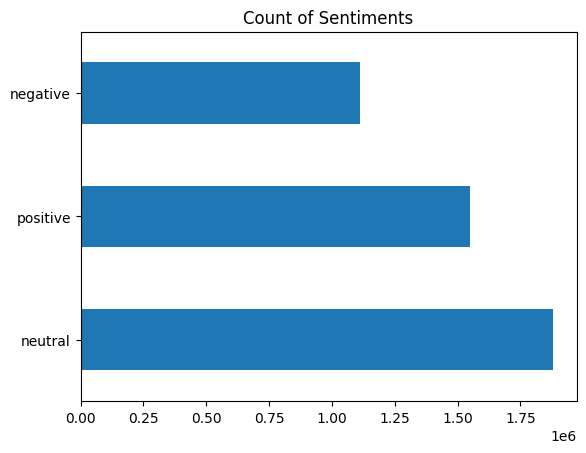

In [ ]:
base_completa_separada_filtrada.label_sentiment.value_counts().plot(kind='barh', title = "Count of Sentiments")

<Axes: title={'center': 'Count of Emotions'}, ylabel='label_emotion'>

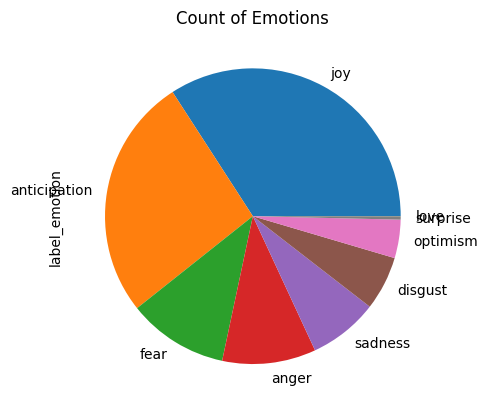

In [ ]:
base_completa_separada_filtrada.label_emotion.value_counts().plot(kind='pie', title = "Count of Emotions")

In [ ]:
base_completa_separada_filtrada.to_csv('base_completa_separada_filtrada.csv', encoding='utf-8')